In [1]:
import stanford_mir; stanford_mir.init()

[&larr; Back to Index](index.html)

# Jupyter Audio Basics

## Audio Libraries

We will mainly use two libraries for audio acquisition and playback: 

### 1. librosa

[`librosa`](https://librosa.github.io/librosa/index.html) is a Python package for music and audio processing by [Brian McFee](https://bmcfee.github.io/). A large portion was ported from [Dan Ellis's Matlab audio processing examples](http://www.ee.columbia.edu/%7Edpwe/resources/matlab/).

### 2. IPython.display.Audio

[`IPython.display.Audio`](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio) lets you play audio directly in an IPython notebook.

## Included Audio Data

This GitHub repository includes many short audio excerpts for your convenience.

Here are the files currently in the `audio` directory:

In [2]:
ls audio

125_bounce.wav                  jangle_pop.mp3
58bpm.wav                       latin_groove.mp3
README.md                       oboe_c6.wav
brahms_hungarian_dance_5.mp3    prelude_cmaj.wav
busta_rhymes_hits_for_days.mp3  simple_loop.wav
c_strum.wav                     simple_piano.wav
clarinet_c6.wav                 sir_duke_piano_fast.mp3
classic_rock_beat.mp3           sir_duke_piano_slow.mp3
classic_rock_beat.wav           sir_duke_trumpet_fast.mp3
conga_groove.wav                sir_duke_trumpet_slow.mp3
cowbell.wav                     thx_original.mp3
drum_samples/                   tone_440.wav
funk_groove.mp3


Visit https://ccrma.stanford.edu/workshops/mir2014/audio/ for more audio files.

## Reading Audio

Use [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) to load an audio file into an audio array. Return both the audio array as well as the sample rate:

In [3]:
import librosa
x, sr = librosa.load('audio/simple_loop.wav')

If you receive an error with `librosa.load`, you may need to [install ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).

Display the length of the audio array and sample rate:

In [4]:
print(x.shape)
print(sr)

(49613,)
22050


## Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

Plot the audio array using [`librosa.display.waveshow`](https://librosa.org/doc/0.8.1/generated/librosa.display.waveshow.html#librosa.display.waveshow):

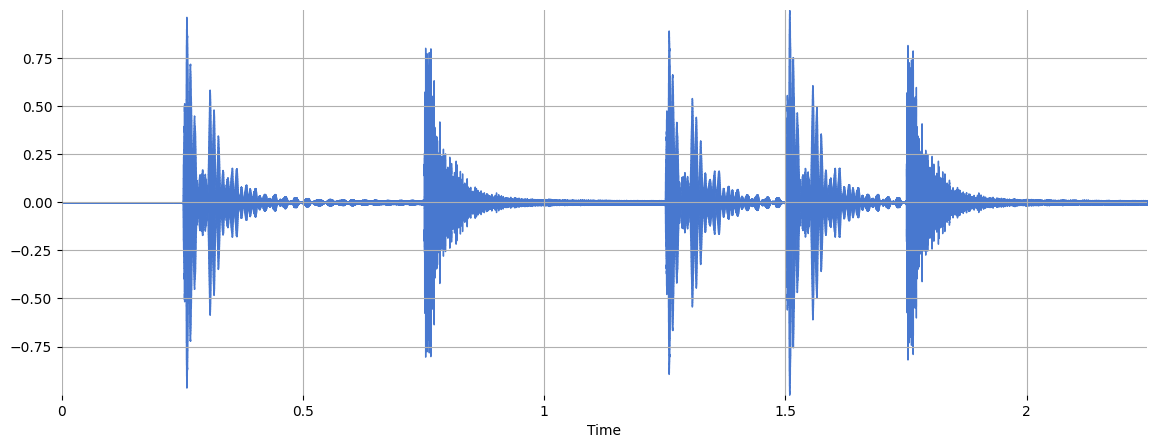

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr);

Display a spectrogram using [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

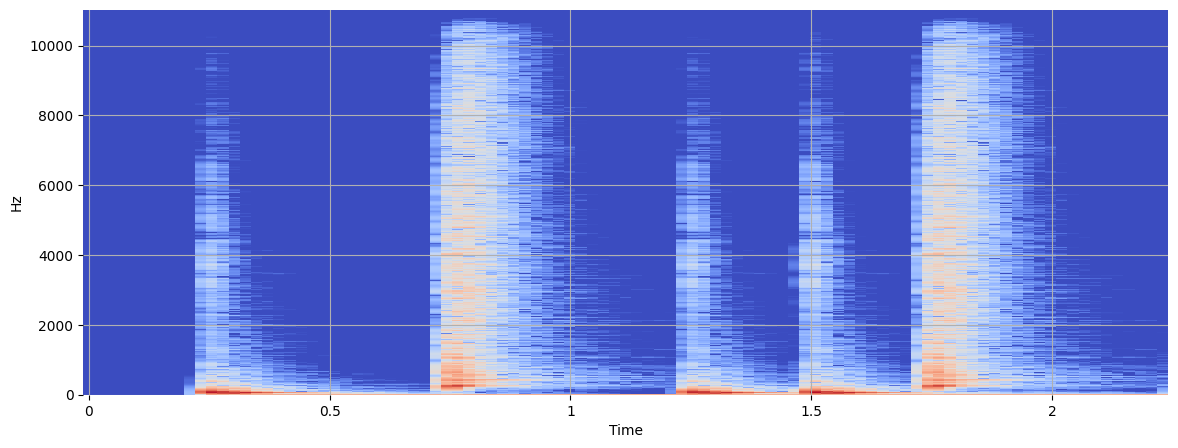

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz');

## Playing Audio

### `IPython.display.Audio`

Using [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), you can play an audio file:

In [8]:
import IPython.display as ipd
ipd.Audio('audio/conga_groove.wav') # load a local WAV file

`Audio` can also accept a NumPy array. Let's synthesize a pure tone at 440 Hz:

In [9]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

Listen to the audio array:

In [10]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Writing Audio

[`soundfile.write`](https://pysoundfile.readthedocs.io/en/0.8.1/#soundfile.write) saves a NumPy array to a WAV file.

In [11]:
import soundfile
soundfile.write(file='audio/tone_440.wav', data=x, samplerate=sr)

[&larr; Back to Index](index.html)